In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/SupervisedML/VehichleInsurance_FraudDetection/

Mounted at /gdrive
/gdrive/MyDrive/SupervisedML/VehichleInsurance_FraudDetection


# Import Data

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods

from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
# combining trian and test datasets

# Data from: https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection
df = pd.read_csv('carclaims.csv')
#df.drop('Unnamed: 0',axis=1,inplace=True) # unnecessary column
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


# Data Profile

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [4]:
from pandas_profiling import ProfileReport

df.profile_report()

Output hidden; open in https://colab.research.google.com to view.

## Preprocessing

In [75]:
# Check for missing data

df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

# EDA

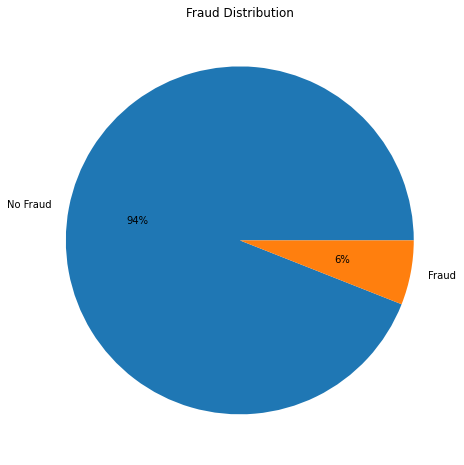

In [78]:
#create pie chart
plt.figure(figsize=(10,8))

plt.pie(df.FraudFound.value_counts().values, 
        labels=['No Fraud', 'Fraud'], 
        autopct='%.0f%%')

plt.title("Fraud Distribution")
plt.show()

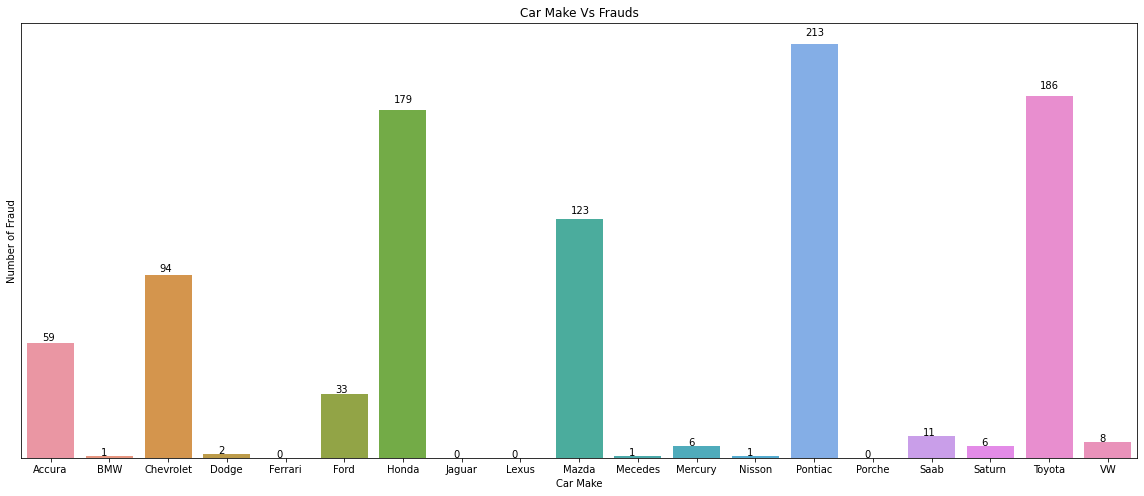

In [96]:
# Replace the Labels to 0 and 1
df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)

make = df.sort_values(['Make'], ascending=False).groupby('Make')['FraudFound'].sum()

plt.figure(figsize=(20,8))
plt.title("Car Make Vs Frauds")

ax = sns.barplot(x=make.index, y=make.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.25, p.get_height()*1.02))

plt.xlabel("Car Make")
plt.ylabel("Number of Fraud")
plt.yticks([])
plt.show()

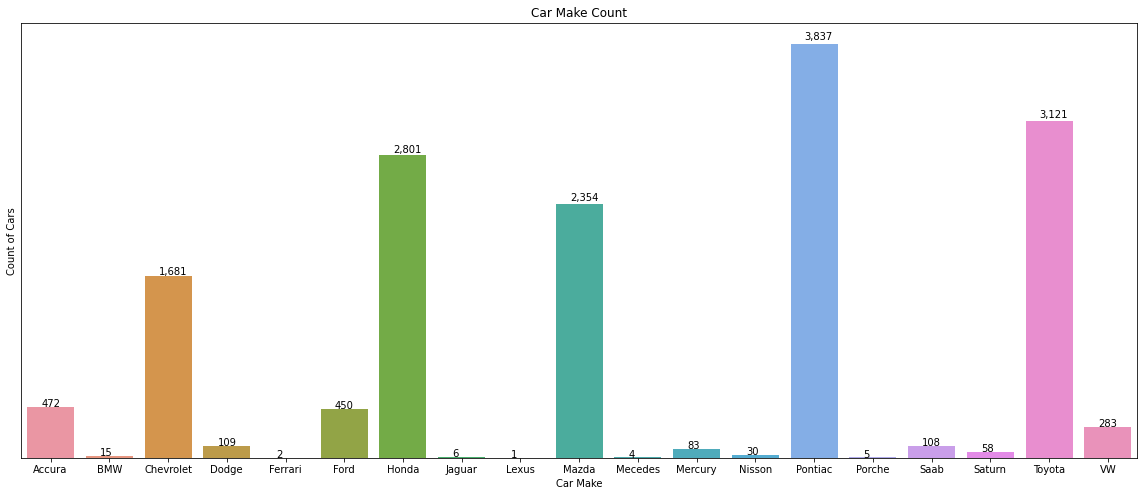

In [112]:
plt.figure(figsize=(20,8))
plt.title("Car Make Count")


ax = sns.countplot(x=df['Make'], order=list(np.unique(df['Make'])))
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))

plt.xlabel("Car Make")
plt.ylabel("Count of Cars")
plt.yticks([])
plt.show()

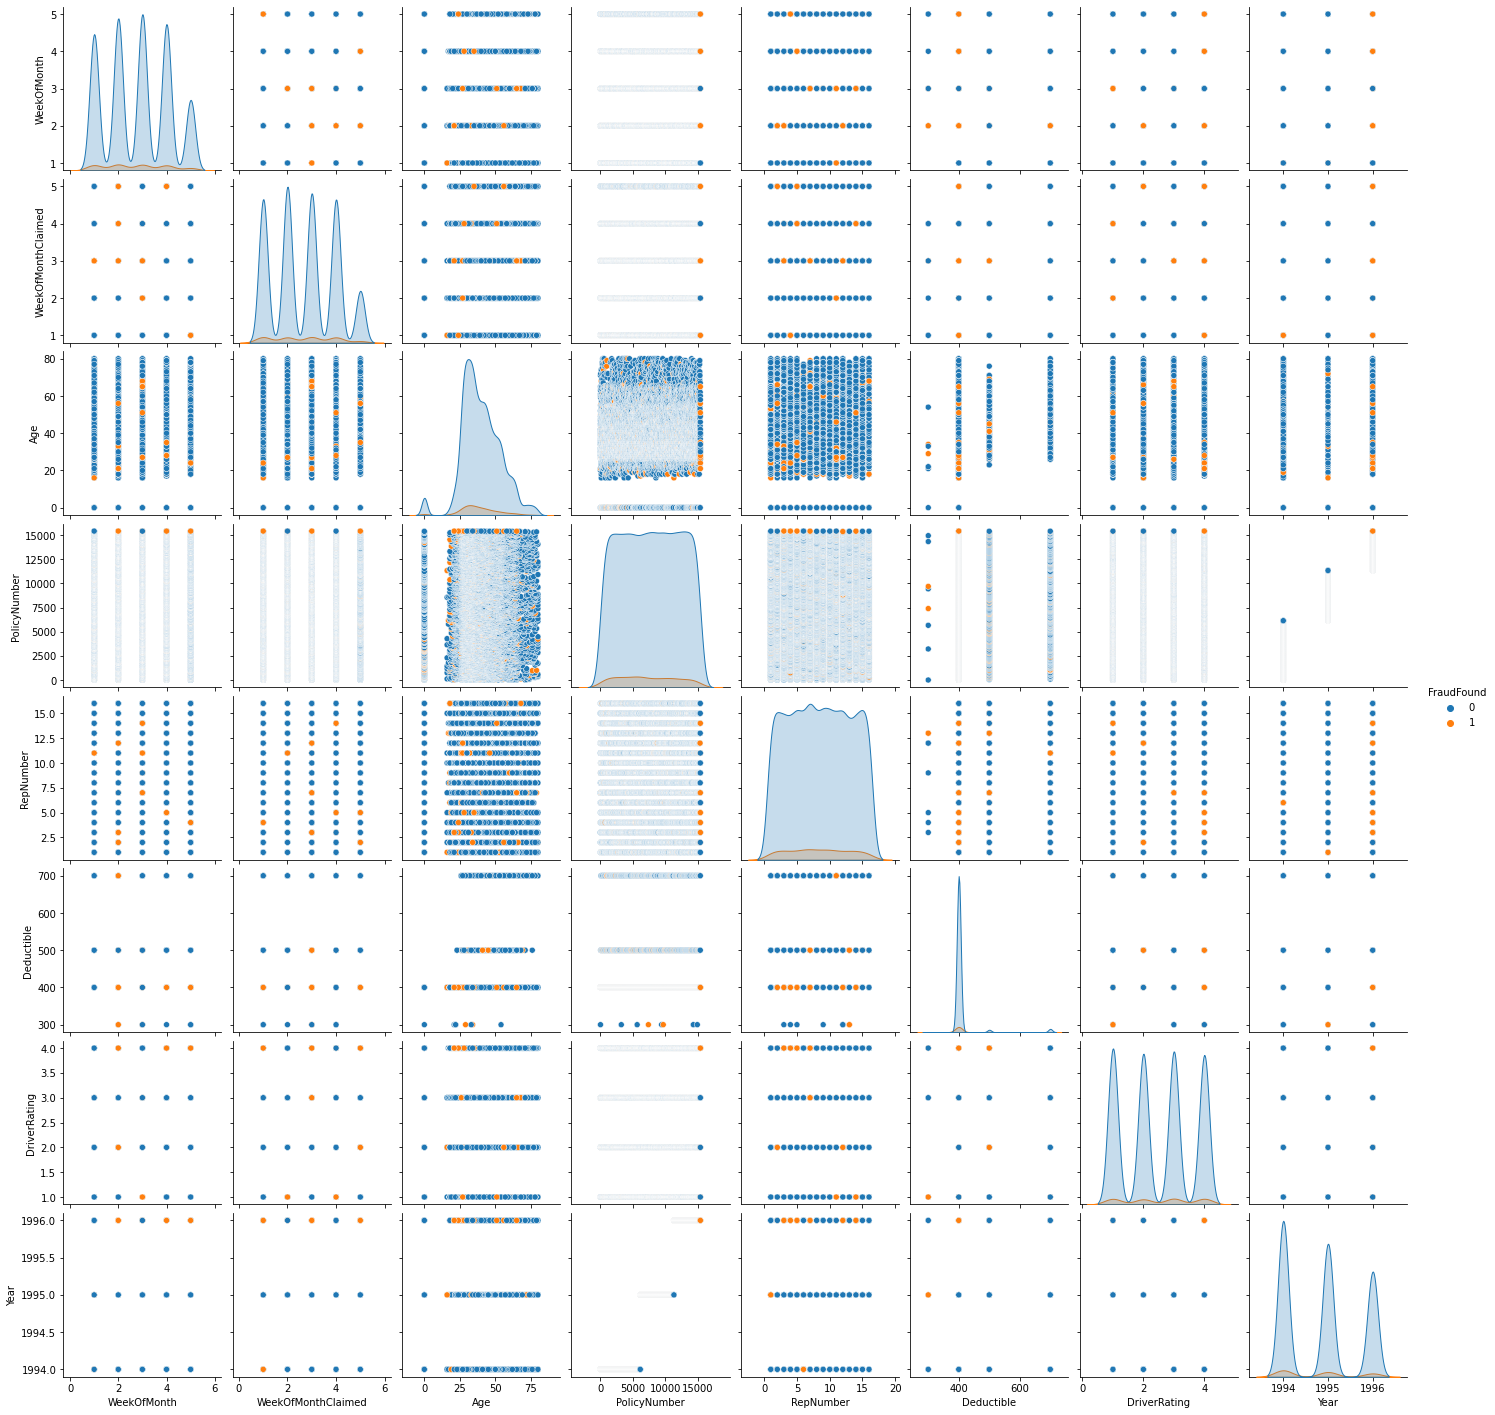

In [113]:
sns.pairplot(df, hue='FraudFound')

# Encode data

In [116]:
# Multi-column label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_obj = df.select_dtypes(include=[np.object])
df_obj = df_obj.apply(le.fit_transform)

df_obj

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,BasePolicy
0,2,6,6,1,6,5,0,2,0,5,...,3,1,3,0,0,0,3,0,2,2
1,4,6,6,1,2,5,1,2,0,4,...,3,4,4,1,0,0,3,3,0,1
2,10,0,6,1,5,10,1,1,0,4,...,0,5,6,0,0,0,3,3,0,1
3,6,2,17,0,1,6,1,1,1,2,...,0,6,7,1,0,0,2,3,0,2
4,4,1,6,1,6,4,0,2,1,4,...,3,3,4,0,0,0,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,0,17,1,6,10,1,1,0,1,...,1,4,4,0,0,0,3,3,0,1
15416,9,4,13,1,1,3,1,1,0,2,...,2,4,4,0,0,0,2,3,2,2
15417,9,4,17,0,1,3,1,2,0,1,...,2,3,3,0,0,0,0,3,0,1
15418,2,1,17,1,5,3,0,1,1,0,...,3,0,4,0,0,0,2,3,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.FraudFound = le.fit_transform(df.FraudFound)

df['FraudFound']

In [40]:
cols = ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 
        'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 
        'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days:Policy-Accident', 
        'Days:Policy-Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 
        'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
        'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars', 'BasePolicy']

df = pd.get_dummies(df, columns=cols, dtype=int)

df

,WeekOfMonthClaimed,Age,PolicyNumber,RepNumber,Deductible,DriverRating,Year,FraudFound,Month_Apr,Month_Aug,...,AddressChange-Claim_no change,AddressChange-Claim_under 6 months,NumberOfCars_1 vehicle,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,1,21,1,12,300,1,1994,No,0,0,...,0,0,0,0,1,0,0,0,0,1
1,4,34,2,15,400,4,1994,No,0,0,...,1,0,1,0,0,0,0,0,1,0
2,2,47,3,7,400,3,1994,No,0,0,...,1,0,1,0,0,0,0,0,1,0
3,1,65,4,4,400,2,1994,No,0,0,...,1,0,1,0,0,0,0,0,0,1
4,2,27,5,3,400,1,1994,No,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,5,35,15416,5,400,4,1996,Yes,0,0,...,1,0,1,0,0,0,0,0,1,0
15416,1,30,15417,11,400,3,1996,No,0,0,...,1,0,0,0,1,0,0,0,0,1
15417,1,24,15418,4,400,4,1996,Yes,0,0,...,1,0,1,0,0,0,0,0,1,0
15418,2,34,15419,6,400,4,1996,No,0,0,...,1,0,1,0,0,0,0,1,0,0


# Split data for Training

In [43]:
X = df.drop(['FraudFound'], axis = 1)
y = df['FraudFound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('-------------\nTraining Data \n-------------')
print(f'Features: {X_train.shape}')
print(f'Target:   {y_train.shape}\n')

print('-------------\nTesting Data \n-------------')
print(f'Features: {X_test.shape}')
print(f'Target:   {y_test.shape}')

-------------
Training Data 
-------------
Features: (12336, 152)
Target:   (12336,)

-------------
Testing Data 
-------------
Features: (3084, 152)
Target:   (3084,)


## Scaling Features

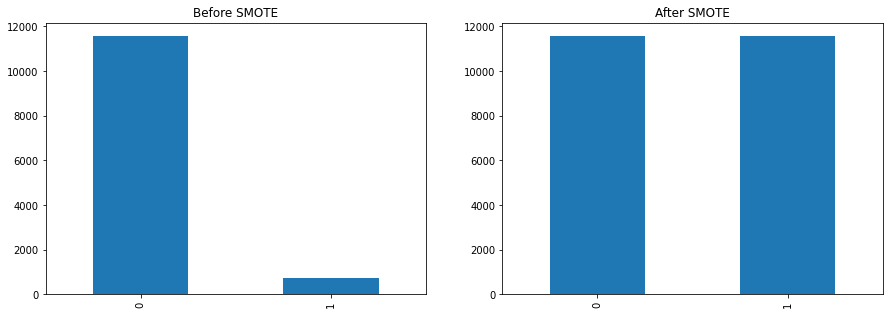

In [44]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

In [45]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

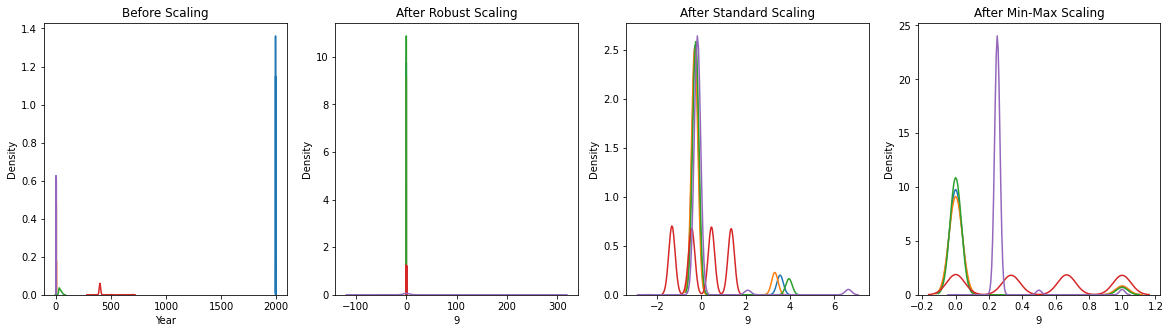

In [49]:
# to compare the effect of each scaler on our dataset
scaler = RobustScaler()
robust_df = scaler.fit_transform(df)
robust_df = pd.DataFrame(robust_df)
  
scaler = StandardScaler()
standard_df = scaler.fit_transform(df)
standard_df = pd.DataFrame(standard_df)
  
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df)
minmax_df = pd.DataFrame(minmax_df)

# using KDE plot
#Note: some columns are opted out in order to speed up the process
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['Year'], ax = ax1)
sns.kdeplot(df['WeekOfMonthClaimed'], ax = ax1)
sns.kdeplot(df['Age'], ax = ax1)
sns.kdeplot(df['Deductible'], ax = ax1)
sns.kdeplot(df['DriverRating'], ax = ax1)


ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_df[9], ax = ax2)
sns.kdeplot(robust_df[8], ax = ax2)
sns.kdeplot(robust_df[7], ax = ax2)
sns.kdeplot(robust_df[5], ax = ax2)
sns.kdeplot(robust_df[4], ax = ax2)


ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_df[9], ax = ax3)
sns.kdeplot(standard_df[8], ax = ax3)
sns.kdeplot(standard_df[7], ax = ax3)
sns.kdeplot(standard_df[5], ax = ax3)
sns.kdeplot(standard_df[4], ax = ax3)


ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_df[9], ax = ax4)
sns.kdeplot(minmax_df[8], ax = ax4)
sns.kdeplot(minmax_df[7], ax = ax4)
sns.kdeplot(minmax_df[5], ax = ax4)
sns.kdeplot(minmax_df[4], ax = ax4)

plt.show()

In [50]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SL models

## kNN

In [51]:
param_grid = {'n_neighbors': range(1,20)}
clf = RandomizedSearchCV(KNeighborsClassifier(), param_grid)
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

In [52]:
### Determining the number of neighbors using RandomizedSearchCV
param_grid = {'n_neighbors': range(1,20)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=7;, score=0.858 total time=   2.3s
[CV 2/5] END .....................n_neighbors=7;, score=0.850 total time=   2.4s
[CV 3/5] END .....................n_neighbors=7;, score=0.845 total time=   2.3s
[CV 4/5] END .....................n_neighbors=7;, score=0.847 total time=   2.2s
[CV 5/5] END .....................n_neighbors=7;, score=0.847 total time=   2.6s
[CV 1/5] END .....................n_neighbors=6;, score=0.891 total time=   2.3s
[CV 2/5] END .....................n_neighbors=6;, score=0.884 total time=   2.3s
[CV 3/5] END .....................n_neighbors=6;, score=0.883 total time=   2.3s
[CV 4/5] END .....................n_neighbors=6;, score=0.882 total time=   2.2s
[CV 5/5] END .....................n_neighbors=6;, score=0.878 total time=   2.6s
[CV 1/5] END .....................n_neighbors=9;, score=0.837 total time=   2.3s
[CV 2/5] END .....................n_neighbors=9;

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)},
                   verbose=3)

In [53]:
knn.best_params_ # best parameter

{'n_neighbors': 1}

In [54]:
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[2586  327]
 [ 125   46]]


              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2913
           1       0.12      0.27      0.17       171

    accuracy                           0.85      3084
   macro avg       0.54      0.58      0.54      3084
weighted avg       0.91      0.85      0.88      3084



## Adaboost

In [55]:
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(X_train,y_train)
adabc_pred = adabc.predict(X_test)

print(confusion_matrix(y_test,adabc_pred))
print('\n')
print(classification_report(y_test,adabc_pred))

[[2886   27]
 [ 168    3]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2913
           1       0.10      0.02      0.03       171

    accuracy                           0.94      3084
   macro avg       0.52      0.50      0.50      3084
weighted avg       0.90      0.94      0.92      3084



## Bagging

In [56]:
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc.fit(X_train,y_train)
bgc_pred = bgc.predict(X_test)

print(confusion_matrix(y_test,bgc_pred))
print('\n')
print(classification_report(y_test,bgc_pred))

[[2908    5]
 [ 163    8]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2913
           1       0.62      0.05      0.09       171

    accuracy                           0.95      3084
   macro avg       0.78      0.52      0.53      3084
weighted avg       0.93      0.95      0.92      3084



## Random Forest

In [58]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[2911    2]
 [ 169    2]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2913
           1       0.50      0.01      0.02       171

    accuracy                           0.94      3084
   macro avg       0.72      0.51      0.50      3084
weighted avg       0.92      0.94      0.92      3084



## Decision Tree

In [59]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[2734  179]
 [ 133   38]]


              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2913
           1       0.18      0.22      0.20       171

    accuracy                           0.90      3084
   macro avg       0.56      0.58      0.57      3084
weighted avg       0.91      0.90      0.90      3084



# Models evaluation with AUROC

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [GaussianNB(), 
               KNeighborsClassifier(n_neighbors= knn.best_params_.get('n_neighbors')),
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(random_state=42),
               AdaBoostClassifier(random_state=42),
               BaggingClassifier(random_state=42)
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

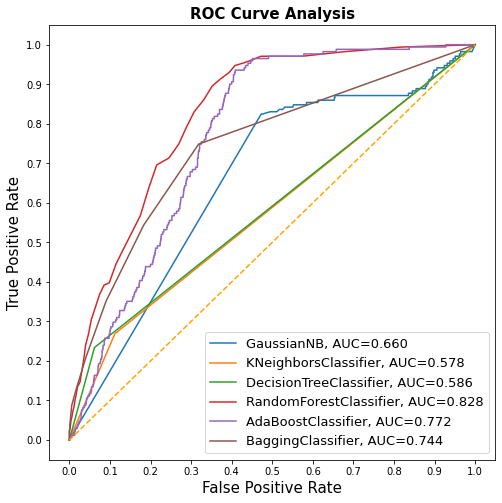

In [69]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()